/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq1/00001601.jpg


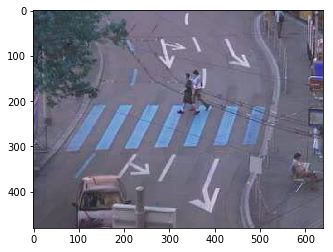

/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq1/00001701.jpg


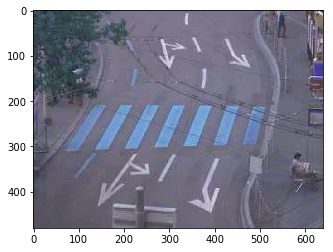

/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq1/00001801.jpg


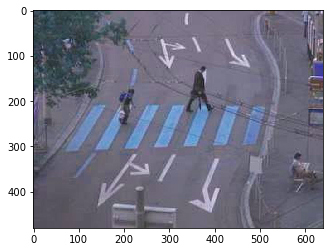

/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq1/00001901.jpg


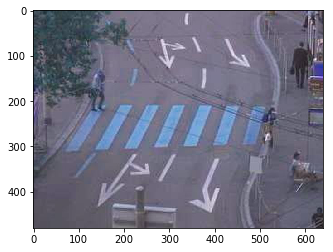

/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq1/00002001.jpg


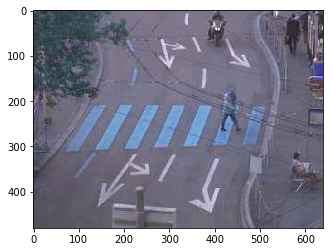

/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq1/00002101.jpg


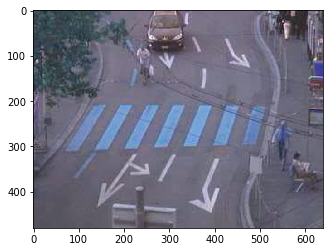

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import util
d = "/home/rmqlife/work/homework/comp790-58/hw2/Datasets/Dataset 1/images/pedxing-seq1"
flist = util.get_filelist_ext(d,ext='jpg')

for i in range(1,len(flist),100):
    print flist[i]
    im = cv2.imread(flist[i])
    blob_im = blob_filter(im)
    plt.imshow(im)
    
    plt.show()


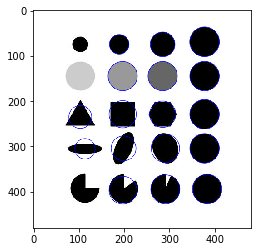

In [17]:
#!/usr/bin/python

# Standard imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def blob_filter(im):
    # Setup SimpleBlobDetector parameters.
    params = cv2.SimpleBlobDetector_Params()

    # Change thresholds
    params.minThreshold = 10
    params.maxThreshold = 200


    # Filter by Area.
    params.filterByArea = True
    params.minArea = 20*50

    # Filter by Circularity
    params.filterByCircularity = True
    params.minCircularity = 0.1

    # Filter by Convexity
    params.filterByConvexity = True
    params.minConvexity = 0.87

    # Filter by Inertia
    params.filterByInertia = True
    params.minInertiaRatio = 0.01

    # Create a detector with the parameters
    ver = (cv2.__version__).split('.')
    if int(ver[0]) < 3 :
        detector = cv2.SimpleBlobDetector(params)
    else : 
        detector = cv2.SimpleBlobDetector_create(params)


    # Detect blobs.
    keypoints = detector.detect(im)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
    # the size of the circle corresponds to the size of blob

    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    return im_with_keypoints

# Read image
im = cv2.imread("./blob.jpg", cv2.IMREAD_GRAYSCALE)
im_with_keypoints = blob_filter(im)

# Show blobs
plt.imshow(im_with_keypoints)
plt.show()